In [1]:
#IMPORT LIBRARY
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import scipy
from scipy import linalg  # noqa: F401
from scipy import ndimage  # noqa: F401
import cv2
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
#DEKLARASI PATH DATA TRAIN DAN TEST
TrainingImagePath= r"F:\KECERDASAN BUATAN\tensorfloww\skin-disease-datasaet\train_set"
TestImagePath = r"F:\KECERDASAN BUATAN\tensorfloww\skin-disease-datasaet\test_set"

#IMAGE DATA GENERATOR -> UNTUK AUGMENTASI GAMBAR PADA DATASHEET TRAINING
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1/255,
        rotation_range=10,
        width_shift_range=0.05,
                             height_shift_range=0.05,
                                     shear_range=0.05,
                                     zoom_range=0.05,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
 
#MEMBUAT OBJEK UNTUK RESCALLING PADA DATASHEET TRAINING
test_datagen = ImageDataGenerator(rescale=1/255)
 
#MEMBUAT DATASHEET TRAINING DARI DIREKTORI, GAMBAR AKAN DIRUBAH SESUAI DENGAN KONFIGURASI YANG DITENTUKAN
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical') #KARENA DATA INI BERKATEGORI BUKAN BINARY


#MEMBUAT DATASHEET TESTING DARI DIREKTORI, GAMBAR AKAN DIRUBAH SESUAI DENGAN KONFIGURASI YANG DITENTUKAN
test_set = test_datagen.flow_from_directory(
        TestImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
 
#MENDAPATKAN INDEKS CLASS YANG SUDAH DITEMUKAN DALAM DATASHEET PENGUJIAN
test_set.class_indices

Found 924 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


{'BA- cellulitis': 0,
 'BA-impetigo': 1,
 'FU-athlete-foot': 2,
 'FU-nail-fungus': 3,
 'FU-ringworm': 4,
 'PA-cutaneous-larva-migrans': 5,
 'VI-chickenpox': 6,
 'VI-shingles': 7}

In [3]:
#MENGAMBIL INDEKS DARI DATASHEET CLASS SEBELUMNYA
TrainClasses=training_set.class_indices

#MEMBUAT PEMETAAN YANG HASILNYA DALAM BENTUK DICTIONARY
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

#MENAMPILKAN PEMETAAN ID CLASS DAN NAMA CLASS
print("Mapping of Face and its ID",ResultMap)

#MENGHITUNG JUMLAH NEURON OUTPUT
#JUMLAH NEURON = JUMLAH CLASS
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'BA- cellulitis', 1: 'BA-impetigo', 2: 'FU-athlete-foot', 3: 'FU-nail-fungus', 4: 'FU-ringworm', 5: 'PA-cutaneous-larva-migrans', 6: 'VI-chickenpox', 7: 'VI-shingles'}

 The Number of output neurons:  8


In [2]:
#MEMBUAT MODEL
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

#MENDEFINISIKAN FUNSGI UNTUK MENJADI MODEL
def create_model():
  #MODEL SEKUENSIAL
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(OutputNeurons, activation='softmax')
  ])

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(OutputNeurons, activation='softmax')
  ])

  #MENGKOMPILASI PROGRAM
  model.compile(optimizer='adam', #MENGGUNAKAN ADAM KARENA DATASHEET BERKATEGORI DAN YANG MENDUKUNG ADALAH ADAM
                loss='categorical_crossentropy', #DATA BERKATEGORI BUKAN BINARY
                metrics=['accuracy']) #YANG INGIN DILIHAT NILAI AKURASINYA

  #MENAMPILKAN RINGKASAN MODEL
  model.summary() 
  return model

  #PANGGIL FUNGSI MODEL
model = create_model()

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
#TRAINING MODEL
history = model.fit(training_set,
                    epochs=50,
                    validation_data=test_set
                    # validation_steps=10
                    )

Epoch 1/50


29/29 [==============================] - 11s 335ms/step - loss: 2.0914 - accuracy: 0.1569 - val_loss: 2.0404 - val_accuracy: 0.1974
Epoch 2/50
29/29 [==============================] - 2s 84ms/step - loss: 2.0062 - accuracy: 0.2002 - val_loss: 1.9352 - val_accuracy: 0.2575
Epoch 3/50
29/29 [==============================] - 2s 85ms/step - loss: 1.8346 - accuracy: 0.3063 - val_loss: 1.7706 - val_accuracy: 0.3734
Epoch 4/50
29/29 [==============================] - 2s 85ms/step - loss: 1.6905 - accuracy: 0.3626 - val_loss: 1.7251 - val_accuracy: 0.3734
Epoch 5/50
29/29 [==============================] - 3s 89ms/step - loss: 1.5736 - accuracy: 0.4351 - val_loss: 1.5845 - val_accuracy: 0.4206
Epoch 6/50
29/29 [==============================] - 3s 87ms/step - loss: 1.4138 - accuracy: 0.5000 - val_loss: 1.5370 - val_accuracy: 0.4206
Epoch 7/50
29/29 [==============================] - 3s 87ms/step - loss: 1.3121 - accuracy: 0.5346 - val_loss: 1.3608 - val_accuracy: 0.5064
Epoch 8/5

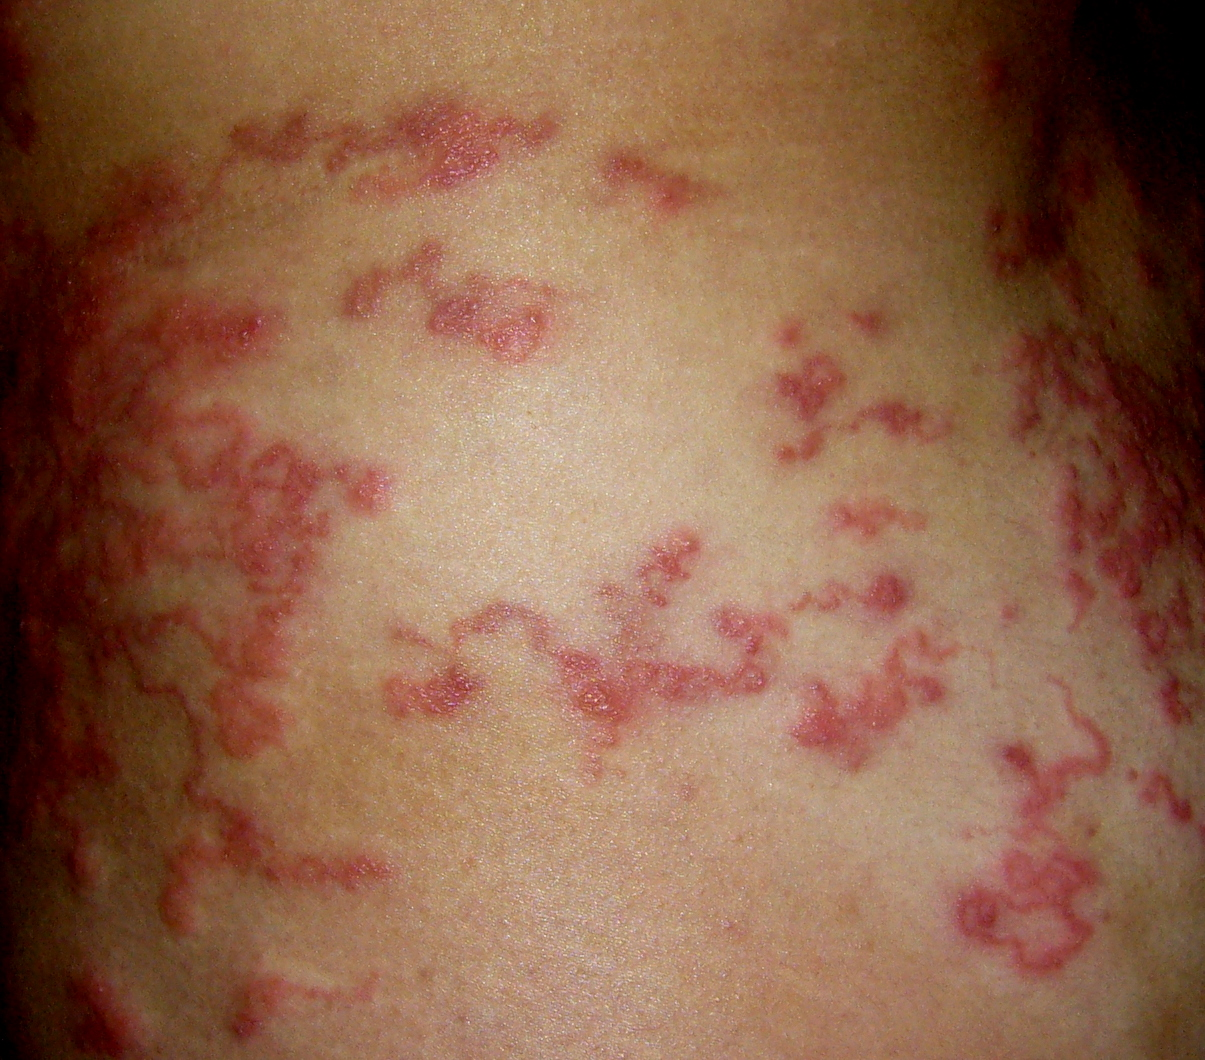

########################################
Prediction is:  PA-cutaneous-larva-migrans


In [8]:
#MEMBUAT PREDIKSI
import numpy as np
from keras.preprocessing import image
from IPython.display import display, Image

ImagePath=r"F:\KECERDASAN BUATAN\TES DATA\cutaneous.jpg"
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=model.predict(test_image,verbose=0)
# print(training_set.class_indices)

display(Image(filename=ImagePath, width=128, height=128))

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

In [7]:
with open("ResultsMap.pkl", 'rb') as fileReadStream:
    ResultMap = pickle.load(fileReadStream)

cap = cv2.VideoCapture(0)  

while True:
    ret, frame = cap.read()
    resized_frame = cv2.resize(frame, (64, 64))
    img_array = np.expand_dims(resized_frame, axis=0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = ResultMap[np.argmax(predictions)]
    cv2.putText(frame, f'Prediction: {predicted_class}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Webcam Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 22ms/step


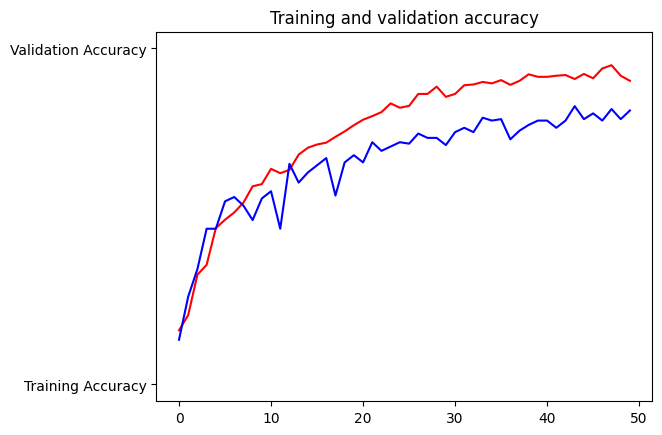

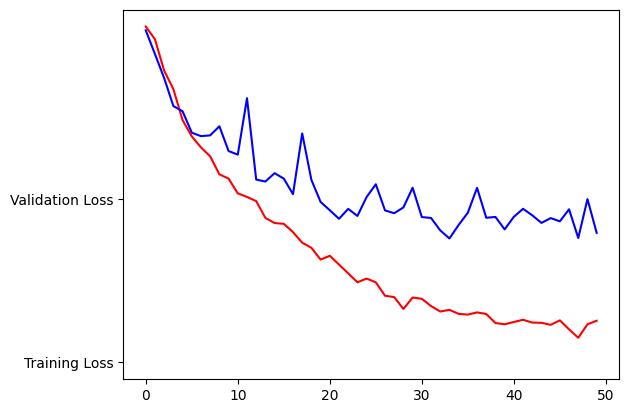

In [15]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()